In [2]:

import imblearn
import numpy as np
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [3]:
msg = pd.read_csv('train.csv')
df_test0=msg[msg["label"]==0]
df_test1=msg[msg["label"]==1]
df_test0=df_test0.iloc[0:250,]
df_test1=df_test1.iloc[0:250,]
msg=msg.drop(df_test0.index)
msg=msg.drop(df_test1.index)
test=pd.concat([df_test0,df_test1])
msg.reset_index(drop=True,inplace=True)

In [4]:
test.reset_index(drop=True,inplace=True)

In [5]:
lemmatizer= WordNetLemmatizer()
corpus1=[]
for i in range(len(msg)):
    review=re.sub('[^a-zA-z]', ' ',msg['tweet'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus1.append(review)

In [6]:
corpus2=[]
for i in range(len(test)):
    review=re.sub('[^a-zA-z]', ' ',test['tweet'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus2.append(review)

In [7]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
electra_model = SentenceTransformer('ddobokki/electra-small-nli-sts')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.2 MB/s 
     |████████████████████████████████| 5.8 MB 70.2 MB/s 
     |████████████████████████████████| 1.3 MB 60.9 MB/s 
     |████████████████████████████████| 182 kB 77.4 MB/s 
     |████████████████████████████████| 7.6 MB 66.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=ce47dcba6a99975dfbc861706c952f77c167c53c7ded8b0b72692711d50a6c8f
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


Downloading:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.91k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/124 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/54.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/495k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/408 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/247k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [8]:
texttransform=electra_model.encode(corpus1)
testtransform=electra_model.encode(corpus2)

In [9]:
import imblearn
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy='minority')
X, y = adasyn.fit_resample(texttransform, msg['label'])

In [10]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM,Bidirectional,Dropout
from keras.layers import CuDNNLSTM

In [11]:
X[0].shape

(256,)

Epoch 1/10
1170/1170 [==============================] - 5s 4ms/step - loss: 0.5439 - accuracy: 0.7337
Epoch 2/10
1170/1170 [==============================] - 4s 4ms/step - loss: 0.4447 - accuracy: 0.7940
Epoch 3/10
1170/1170 [==============================] - 4s 4ms/step - loss: 0.3889 - accuracy: 0.8257
Epoch 4/10
1170/1170 [==============================] - 4s 4ms/step - loss: 0.3543 - accuracy: 0.8439
Epoch 5/10
1170/1170 [==============================] - 4s 4ms/step - loss: 0.3316 - accuracy: 0.8567
Epoch 6/10
1170/1170 [==============================] - 4s 4ms/step - loss: 0.3125 - accuracy: 0.8670
Epoch 7/10
1170/1170 [==============================] - 4s 4ms/step - loss: 0.2989 - accuracy: 0.8759
Epoch 8/10
1170/1170 [==============================] - 5s 4ms/step - loss: 0.2872 - accuracy: 0.8829
Epoch 9/10
1170/1170 [==============================] - 4s 4ms/step - loss: 0.2788 - accuracy: 0.8862
Epoch 10/10
16/16 [==============================] - 0s 2ms/step
              pre

Text(0.5, 15.0, 'Predicted label')

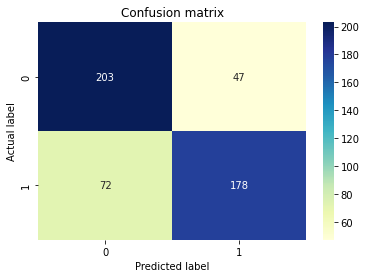

In [16]:
xt=X.reshape(X.shape[0],1,X.shape[1])
model=Sequential()
model.add(CuDNNLSTM(units = 6, kernel_initializer = 'uniform', input_shape = (1,X.shape[1])))
# Adding the second hidden layer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model.fit(xt, y, batch_size = 50, epochs = 10)
y_pred = model.predict(testtransform.reshape(500,1,X.shape[1]))
y_pred = (y_pred > 0.5)
from sklearn.metrics import classification_report
print(classification_report(test['label'],y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test['label'], y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Epoch 1/10
585/585 [==============================] - 4s 5ms/step - loss: 0.5684 - accuracy: 0.7180
Epoch 2/10
585/585 [==============================] - 3s 5ms/step - loss: 0.4561 - accuracy: 0.7888
Epoch 3/10
585/585 [==============================] - 3s 5ms/step - loss: 0.3811 - accuracy: 0.8310
Epoch 4/10
585/585 [==============================] - 3s 5ms/step - loss: 0.3334 - accuracy: 0.8589
Epoch 5/10
585/585 [==============================] - 4s 6ms/step - loss: 0.2981 - accuracy: 0.8783
Epoch 6/10
585/585 [==============================] - 3s 5ms/step - loss: 0.2724 - accuracy: 0.8901
Epoch 7/10
585/585 [==============================] - 3s 4ms/step - loss: 0.2521 - accuracy: 0.9014
Epoch 8/10
585/585 [==============================] - 3s 5ms/step - loss: 0.2335 - accuracy: 0.9100
Epoch 9/10
585/585 [==============================] - 3s 4ms/step - loss: 0.2204 - accuracy: 0.9152
Epoch 10/10
16/16 [==============================] - 0s 3ms/step
              precision    recall  

Text(0.5, 15.0, 'Predicted label')

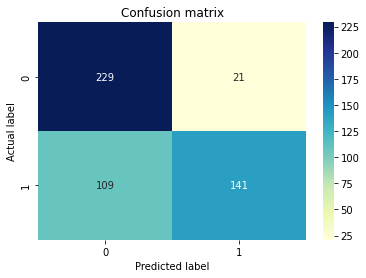

In [13]:
model=Sequential()
model.add(Bidirectional(CuDNNLSTM(units = 6, kernel_initializer = 'uniform', input_shape = (1,X.shape[1]))))
# Adding the second hidden layer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model.fit(xt, y, batch_size = 100, epochs = 10)
y_pred = model.predict(testtransform.reshape(500,1,X.shape[1]))
y_pred = (y_pred > 0.5)
from sklearn.metrics import classification_report
print(classification_report(test['label'],y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test['label'], y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:
import tensorflow.keras as keras

# Build the model
model = keras.Sequential([
    keras.layers.Conv1D(128, kernel_size=5, activation='relu', input_shape=(X.shape[1], 1)),
    keras.layers.GlobalMaxPool1D(),
   
    keras.layers.Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'),
    keras.layers.Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'),
    keras.layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')

])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X, y, batch_size = 100, epochs = 10)

y_pred = model.predict(testtransform.reshape(500,256,1))
y_pred = (y_pred > 0.5)
from sklearn.metrics import classification_report
print(classification_report(test['label'],y_pred))

Epoch 1/10
585/585 [==============================] - 7s 5ms/step - loss: 0.6208 - accuracy: 0.6485
Epoch 2/10
585/585 [==============================] - 2s 4ms/step - loss: 0.5440 - accuracy: 0.7248
Epoch 3/10
585/585 [==============================] - 2s 4ms/step - loss: 0.5270 - accuracy: 0.7378
Epoch 4/10
585/585 [==============================] - 3s 5ms/step - loss: 0.5112 - accuracy: 0.7483
Epoch 5/10
585/585 [==============================] - 3s 6ms/step - loss: 0.5045 - accuracy: 0.7529
Epoch 6/10
585/585 [==============================] - 3s 5ms/step - loss: 0.4982 - accuracy: 0.7582
Epoch 7/10
585/585 [==============================] - 4s 6ms/step - loss: 0.4926 - accuracy: 0.7622
Epoch 8/10
585/585 [==============================] - 4s 6ms/step - loss: 0.4893 - accuracy: 0.7644
Epoch 9/10
585/585 [==============================] - 2s 4ms/step - loss: 0.4844 - accuracy: 0.7673
Epoch 10/10
16/16 [==============================] - 0s 6ms/step
              precision    recall  

In [15]:
y_pred = model.predict(testtransform.reshape(500,256,1))
y_pred = (y_pred > 0.5)
from sklearn.metrics import classification_report
print(classification_report(test['label'],y_pred))

16/16 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.60      0.78      0.68       250
           1       0.69      0.49      0.57       250

    accuracy                           0.63       500
   macro avg       0.65      0.63      0.63       500
weighted avg       0.65      0.63      0.63       500

